## Librerias

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN
from sklearn import metrics
import seaborn as sns

## Carga de datos
Extraido de https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [145]:
df_raw = pd.read_csv("./data.csv")
df_raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [146]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Se eliminan columnas que no se utilizaran

In [147]:
df_raw.drop(["Unnamed: 32", "id"], axis = 1, inplace=True)

### Se transforma la variable objetivo a valores numericos donde 1 es maligno y 0 es benigno

In [148]:
df_raw['diagnosis'].replace(to_replace='M', value = 1, inplace=True)
df_raw['diagnosis'].replace(to_replace='B', value = 0, inplace=True)

In [149]:
df_data_processing = df_raw.copy()

<AxesSubplot: xlabel='diagnosis', ylabel='Count'>

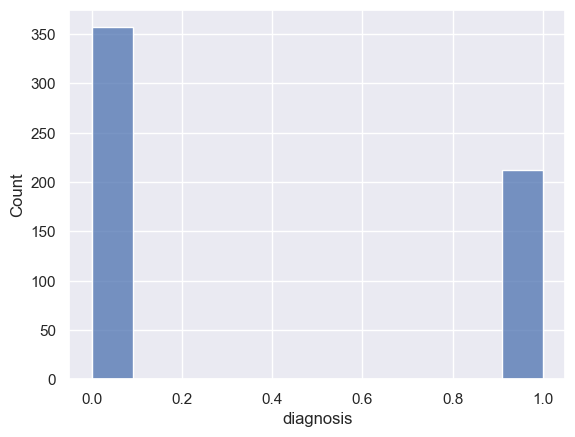

In [152]:
sns.histplot(df_data_processing.diagnosis)

### Se evalua si existe alguna corelación entre las variables

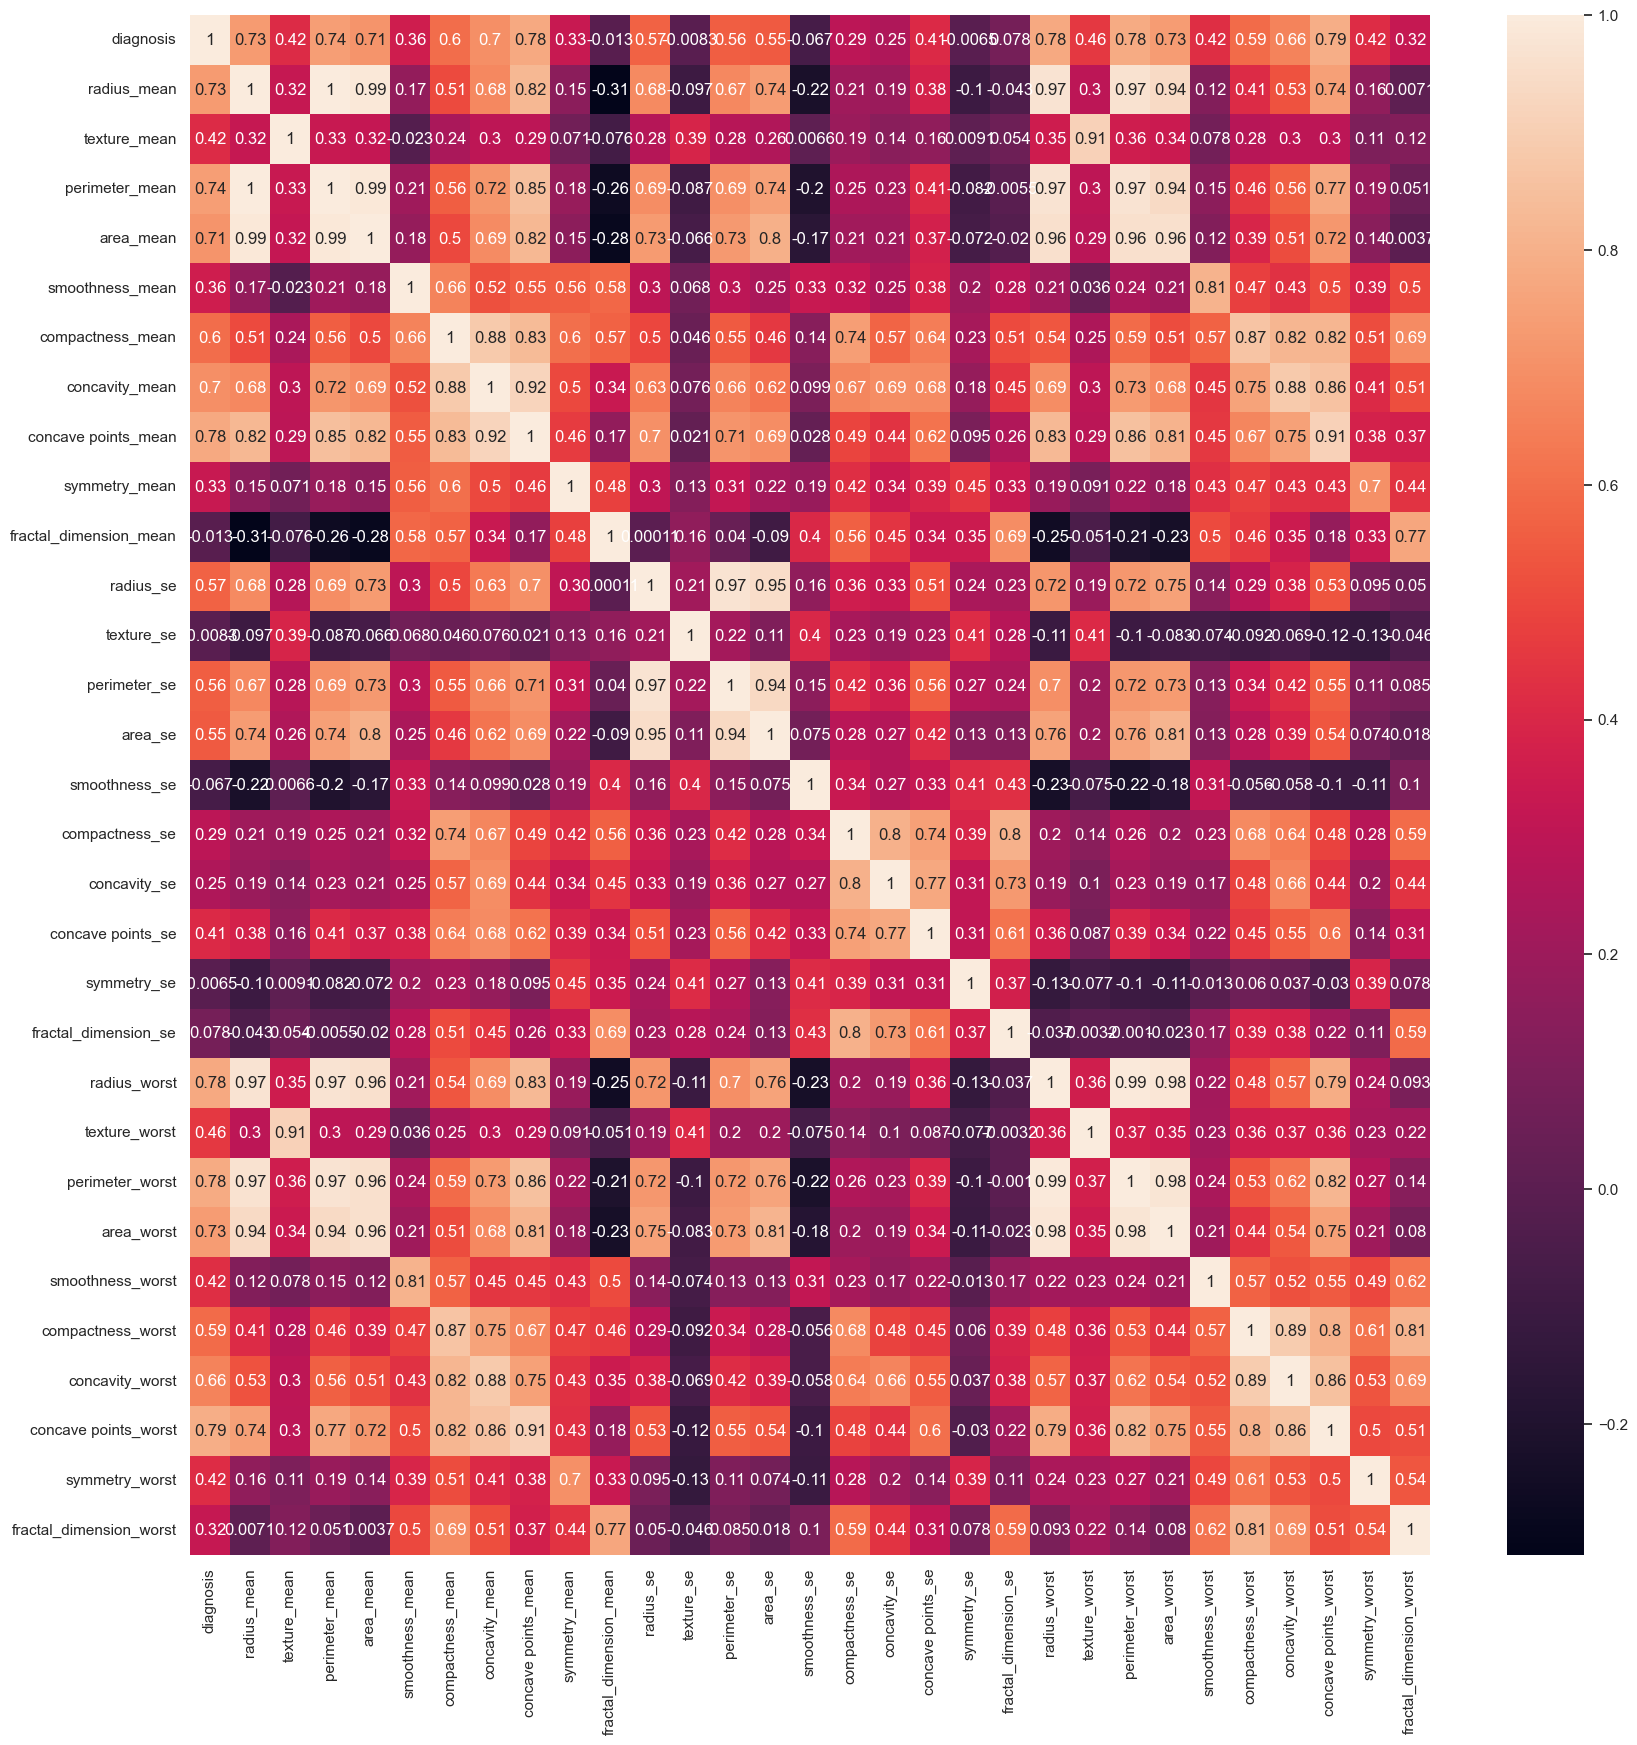

In [150]:
plt.figure(figsize=(20,20))
sns.heatmap(df_data_processing.corr(), annot=True)
plt.show()

### Se eliminan variables con alta correlación
* Se eliminan los parametros ya que estan directamente relacionados al radio

In [151]:
df_data_processing.drop(["perimeter_mean", "perimeter_worst"], axis = 1, inplace=True)

## Creación del modelo

### Escalamiento de los datos

In [153]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)
df_data_processing_scaled.columns = df_data_processing.columns
df_data_processing_scaled.head(5)

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.183042,0.620776,0.141525,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.091110,0.606901,0.303571,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.127006,0.556386,0.360075,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.287205,0.248310,0.385928,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.145800,0.519744,0.123934,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### Separación de variables

In [154]:
X = df_data_processing_scaled.drop('diagnosis',axis=1)
y = df_data_processing_scaled['diagnosis'].values

### Creación del modelo

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [156]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

### Resultado del modelo

In [157]:
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.9649122807017544


<Figure size 1100x1100 with 0 Axes>

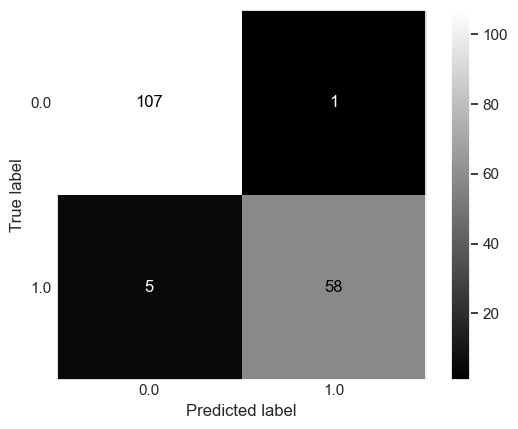

In [158]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.tick_params(axis=u'both', which=u'both',length=0);
plt.grid(visible=None);
plt.show();

In [159]:
predicciones = model.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       108
         1.0       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



## Modelo ajustado con distribución 50/50
Aunque el modelo anterior tiene un buen puntaje se decide realizar un segundo ajuste del modelo. Ya que la distribución logistica tiene un mejor rendimiento con variables equitativamente distribuidas.


In [160]:
imp = SMOTEENN(sampling_strategy=0.99)
X_bal,y_bal = imp.fit_resample(X,y)

<AxesSubplot: ylabel='Count'>

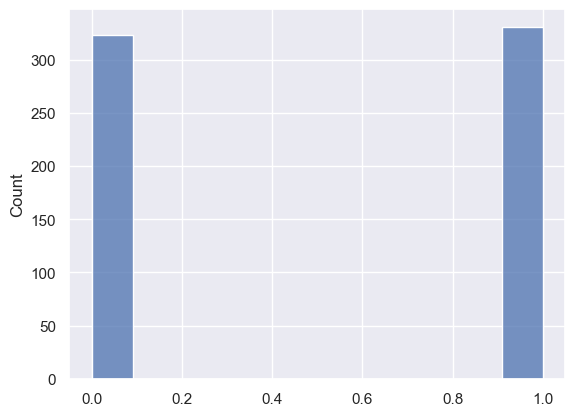

In [161]:
sns.histplot(y_bal)

In [162]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal,y_bal, test_size=0.3, random_state=42)

In [163]:
model = LogisticRegression()
result = model.fit(X_train_bal, y_train_bal)

In [164]:
predicciones = model.predict(X_test_bal).reshape(-1,1)
print(classification_report(y_test_bal,predicciones))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       107
         1.0       0.99      0.98      0.98        90

    accuracy                           0.98       197
   macro avg       0.99      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197



In [165]:
prediction_test = model.predict(X_test_bal)
print(metrics.accuracy_score(y_test_bal,prediction_test ))

0.9847715736040609


<Figure size 1100x1100 with 0 Axes>

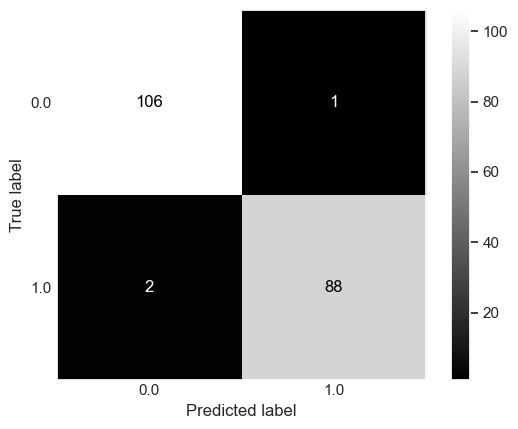

In [166]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test_bal, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.tick_params(axis=u'both', which=u'both',length=0);
plt.grid(visible=None);
plt.show();

## Conclusiones
* El modelo ajustado usando datos equitativos es mucho mejor que el modelo ajustado con todos los datos.
* El modelo es capaz de clasificar correctamente el 99% de casos con un diagnostico de masa maligna.